### Decision Tree Regressor

1. The main aim of this project is to predict the price of the house using the Decision Tree Regressor Model for the House Price Dataset.

2. At first, the project's aim is to 

     (a.)   construct the decision tree

     (b.)   then predict the price of the house for the given sample data.


### Steps performed by this algorithm:

1.   Import all the necessary libraries

2.   Load the dataset

3.   Explore EDA

4.   Divide the dataset into independent and dependent variables

5.   Divide the independent and dependent variables into training and testing data

6.   Perform the Feature Scaling on the input data

7.   Train the Decision Tree Regressor model

8.   Predict the model

9.   Evaluate the model performance

10.  Visualization of Results for actual vs Predicted price

11.  Visualize the Decision Tree

12.  Predict the output for the test data

### Step 1:  Import all the necessary libraries

In [1300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from   sklearn.datasets        import fetch_california_housing
from   sklearn.preprocessing   import StandardScaler
from   sklearn.model_selection import train_test_split
from   sklearn.metrics         import mean_absolute_error, mean_squared_error, root_mean_squared_error
from   sklearn.tree            import DecisionTreeRegressor, plot_tree

### Step 2:  Load the dataset

In [1301]:
data = fetch_california_housing(as_frame=True)

In [1302]:
print(data)

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

In [1303]:
data.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [1304]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [1305]:
df=data.frame

In [1306]:
### Display the entire dataset

print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

### OBSERVATIONS:

1. The above dataset represents the California Housing Dataset.

2. It speaks about the House price for the California Dataset.

3.  All the above columns are the inputs.

       Inputs are:-
         
        (a.) 'MedInc'    ----------------->     Median Income
        
        (b.) 'HouseAge'  ----------------->     Median House Age
        
        (c.) 'AveRooms'  ------------------>   Average number of rooms per house hold
        
        (d.) 'AveBedrooms' ---------------->   Average number of bedrroms per house hold
        
        (e.) 'Population' ---------------->    Total Population in a district
        
        (f.) 'AveOccup'   ----------------->   Average Occupance per household

        (g.) 'Latitude'   ----------------->   Geographical Latitude
        
        (h.) 'Longitude'  ----------------->   Geographical Longitude
        
        (i.) 'MedHouseVal' ---------------->   Median House Value



 5. But Output is the 'MedHouse Val'.

### Step 3:  Explore EDA

In [1307]:
### Display the top five rows of the dataset

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [1308]:
### Display the bottom five records of the dataset

print(df.tail())

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  


In [1309]:
### Get all the columns used in the dataset

df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [1310]:
### Get the total number of records in the dataset

print("Total number of records used in the dataset is:", len(df))

Total number of records used in the dataset is: 20640


In [1311]:
### Shape of the dataset

print(df.shape)

(20640, 9)


In [1312]:
### Get all the information about the columns used in the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


### OBSERVATIONS:

1. All the columns are numerical in nature.

In [1313]:
### get the statistical summary about the dataset

print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [1314]:
### Check if there are any NULL Values in the dataset

print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


### OBSERVATIONS:

1.  There are no NULL Values in the dataset.

In [1315]:
### Check if there are any duplicate records in the dataset

df[df.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


### OBSERVATIONS:

1.   There are no duplicate rcords in the dataset.

### Step 4:  Divide the dataset into independent and dependent variables

In [1316]:
X = df.drop(columns='MedHouseVal', axis=1)

Y = df['MedHouseVal']

In [1317]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [1318]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

### Step 5:  Divide the independent and dependent variables into training and testing data

In [1319]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [1320]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [1321]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [1322]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (16512, 8)
Shape of the input testing  data is: (4128, 8)


In [1323]:
Y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 16512, dtype: float64

In [1324]:
Y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: MedHouseVal, Length: 4128, dtype: float64

In [1325]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (16512,)
Shape of the output testing  data is: (4128,)


### Step 6:  Perform the Feature Scaling on the input data

In [1326]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

### scale the inputs

X_train_scaled  = sc.fit_transform(X_train)

X_test_scaled   = sc.transform(X_test)

In [1327]:
X_train_scaled

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]], shape=(16512, 8))

In [1328]:
X_test_scaled

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]], shape=(4128, 8))

### OBSERVATIONS:

1. All the inputs have been scaled in one range. So now the training of the model becomes very easy.

### Step 7:  Train the Decision Tree Regressor model

In [1329]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

### define the object for DecisionTreeRegressor

decreg = DecisionTreeRegressor(random_state=42)

### using the object for Decision Tree Regressor, train the model

decreg.fit(X_train_scaled, Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### OBSERVATIONS:

1. The DecisionTreeRegressor has been trained with the help of the training data using the following inputs:-

   (a.)   criterion -------------> 'squared_error'

   (b.)   splitter  -------------> 'best'

   (c.)   min_samples_split ------>  2 samples needed for splitting.

   (d.)   min_samples_leaf ------->  1 leaf node.

### Step 8:  Predict the model

In [1330]:
Y_pred = decreg.predict(X_test_scaled)

In [1331]:
Y_pred

array([0.414  , 1.203  , 5.00001, ..., 5.00001, 0.66   , 2.172  ],
      shape=(4128,))

### Step 9:  Evaluate the model performance

In [1332]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error


mae = mean_absolute_error(Y_test, Y_pred)

print("Mean Absolute Error is:", mae)

Mean Absolute Error is: 0.45390448401162786


In [1333]:
mse = mean_squared_error(Y_test, Y_pred)

print("Mean Squared Error is:", mse)

Mean Squared Error is: 0.49396854311945243


In [1334]:
rmse = root_mean_squared_error(Y_test, Y_pred)

print("Root Mean Squared Error is:", rmse)

Root Mean Squared Error is: 0.7028289572288925


### Step 10: Visualization of Results for actual vs Predicted price

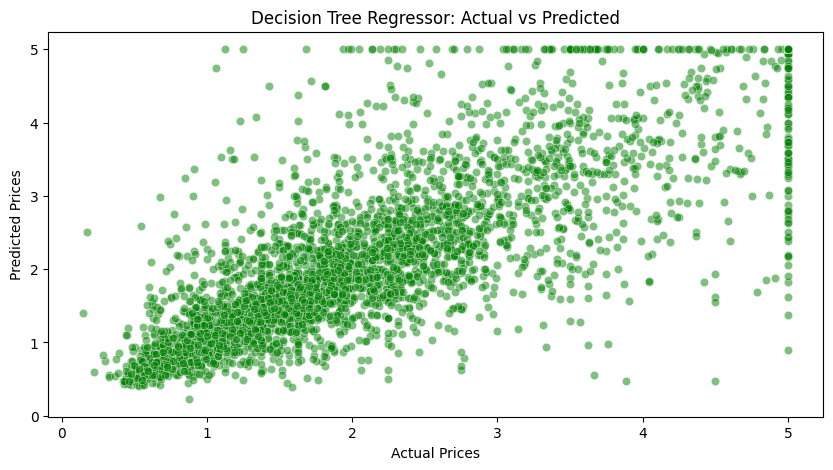

In [1335]:
plt.figure(figsize=(10,5))

### plot the Actual vs Predicted Prices
sns.scatterplot(x=Y_test,y = Y_pred, alpha=0.5,color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.show()

### OBSERVATIONS:

1. With the increase in the Actual Prices, the Predicted Prices also increases.

### Step 11: Visualize the Decision Tree

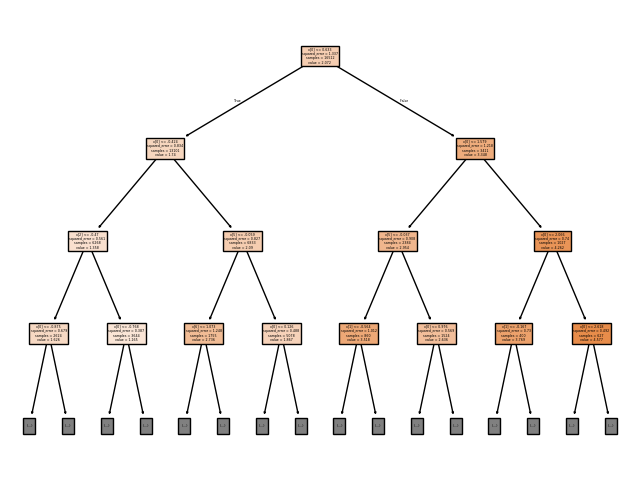

In [1336]:
plt.figure(figsize=(8,6))

plot_tree(decreg, filled=True, max_depth=3)

plt.show()

### OBSERVATIONS:

1. A decision Tree Regressor has been built.

### Step 12: Predict the output for the test data

In [1337]:
import numpy as np

sampledata = np.array([[8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23]])

print(sampledata)

### predict the Med House Val

### Transform the output

Y_trans = sc.transform(sampledata)

print(Y_trans)


### predict the output

Y_pred_output = decreg.predict(Y_trans)

print(Y_pred_output)

[[   8.3252     41.          6.984127    1.02381   322.          2.555556
    37.88     -122.23    ]]
[[ 2.33397811  0.98330419  0.64880422 -0.1682237  -0.97135592 -0.04675996
   1.04692041 -1.32016306]]
[3.822]


C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1338]:
print("Predicted Output for the given sample data is:", Y_pred_output[0])

Predicted Output for the given sample data is: 3.822


In [1339]:
df.iloc[0,:]

MedInc           8.325200
HouseAge        41.000000
AveRooms         6.984127
AveBedrms        1.023810
Population     322.000000
AveOccup         2.555556
Latitude        37.880000
Longitude     -122.230000
MedHouseVal      4.526000
Name: 0, dtype: float64